In [1]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset & Dataloader

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
bs = 128

transform = transforms .Compose ([
    transforms.Grayscale(), 
    transforms.ToTensor()
])

train_set = datasets.ImageFolder ("data/train/", transform=transform)
trainloader = DataLoader (train_set, batch_size=bs, shuffle=True, num_workers=2)

test_set = datasets. ImageFolder ("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True, num_workers=2)

In [4]:
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

# Arsitektur & Config

In [5]:
from jcopdl.layers import linear_block

In [9]:
class FashionClassifier (nn.Module) :
    def __init__(self, input_size, n1, n2, output_size, dropout=0.2):
        super().__init__()
        self.fc = nn. Sequential(
            nn. Flatten(),
            linear_block(input_size, n1, dropout=dropout), 
            linear_block(n1, n2, dropout=dropout), 
            linear_block(n2, output_size, activation="lsoftmax" )
        )

    def forward(self, x):
        return self.fc(x)

In [7]:
config = set_config({
    "input_size": 784,
    "n1": 256,
    "n2" : 64,
    "output_size": len(train_set.classes),
    "dropout": 0.2
})

# Training Preparation -> MCOC

In [10]:
# Model
model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)

# Criterion
criterion = nn.NLLLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Callback
callback = Callback(model, config, outdir="model")

# Training

In [12]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()

    cost = 0
    correct = 0

    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()

    cost = cost / len(dataset)
    acc = correct / len(dataset)
    
    return cost, acc

Train:   0%|          | 0/313 [00:01<?, ?it/s]

Test:   0%|          | 0/157 [00:10<?, ?it/s]


Epoch     1
Train_cost  = 0.7322 | Test_cost  = 0.4592 | Train_score = 0.7396 | Test_score = 0.8329 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.4713 | Test_cost  = 0.3973 | Train_score = 0.8338 | Test_score = 0.8520 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.4154 | Test_cost  = 0.3884 | Train_score = 0.8519 | Test_score = 0.8545 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.3909 | Test_cost  = 0.3652 | Train_score = 0.8596 | Test_score = 0.8628 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.3661 | Test_cost  = 0.3511 | Train_score = 0.8672 | Test_score = 0.8676 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.3517 | Test_cost  = 0.3438 | Train_score = 0.8713 | Test_score = 0.8761 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.3406 | Test_cost  = 0.3317 | Train_score = 0.8766 | Test_score = 0.8791 |


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


Train:   0%|          | 0/313 [00:40<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3291 | Test_cost  = 0.3621 | Train_score = 0.8800 | Test_score = 0.8678 |
==> EarlyStop patience =  1 | Best test_score: 0.8791


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3172 | Test_cost  = 0.3416 | Train_score = 0.8841 | Test_score = 0.8723 |
==> EarlyStop patience =  2 | Best test_score: 0.8791


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3108 | Test_cost  = 0.3176 | Train_score = 0.8864 | Test_score = 0.8835 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.3030 | Test_cost  = 0.3142 | Train_score = 0.8891 | Test_score = 0.8855 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2910 | Test_cost  = 0.3197 | Train_score = 0.8940 | Test_score = 0.8825 |
==> EarlyStop patience =  1 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2876 | Test_cost  = 0.3130 | Train_score = 0.8933 | Test_score = 0.8851 |
==> EarlyStop patience =  2 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2786 | Test_cost  = 0.3200 | Train_score = 0.8976 | Test_score = 0.8804 |
==> EarlyStop patience =  3 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.2722 | Test_cost  = 0.3173 | Train_score = 0.8988 | Test_score = 0.8855 |
==> EarlyStop patience =  4 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:01<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.2666 | Test_cost  = 0.3130 | Train_score = 0.9005 | Test_score = 0.8871 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.2586 | Test_cost  = 0.3163 | Train_score = 0.9034 | Test_score = 0.8862 |
==> EarlyStop patience =  1 | Best test_score: 0.8871


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2589 | Test_cost  = 0.3168 | Train_score = 0.9044 | Test_score = 0.8842 |
==> EarlyStop patience =  2 | Best test_score: 0.8871


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2524 | Test_cost  = 0.3256 | Train_score = 0.9062 | Test_score = 0.8851 |
==> EarlyStop patience =  3 | Best test_score: 0.8871


Train:   0%|          | 0/313 [00:01<?, ?it/s]

Test:   0%|          | 0/157 [00:40<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out



Epoch    20
Train_cost  = 0.2498 | Test_cost  = 0.3093 | Train_score = 0.9081 | Test_score = 0.8883 |


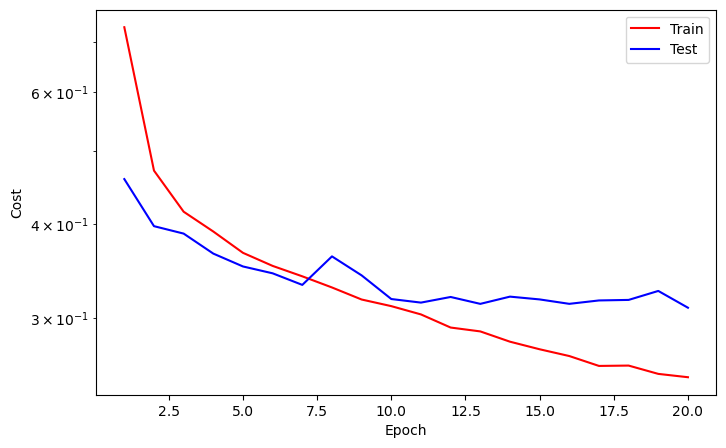

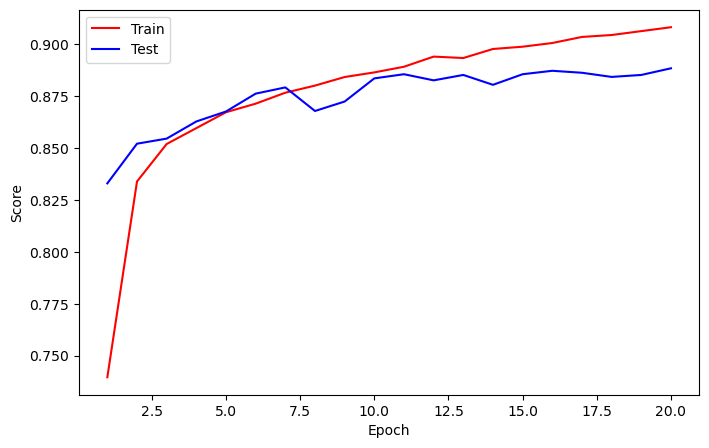

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2462 | Test_cost  = 0.3175 | Train_score = 0.9086 | Test_score = 0.8861 |
==> EarlyStop patience =  1 | Best test_score: 0.8883


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2396 | Test_cost  = 0.3079 | Train_score = 0.9111 | Test_score = 0.8878 |
==> EarlyStop patience =  2 | Best test_score: 0.8883


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.2346 | Test_cost  = 0.3138 | Train_score = 0.9125 | Test_score = 0.8897 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.2308 | Test_cost  = 0.3067 | Train_score = 0.9135 | Test_score = 0.8926 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.2292 | Test_cost  = 0.3188 | Train_score = 0.9129 | Test_score = 0.8895 |
==> EarlyStop patience =  1 | Best test_score: 0.8926


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.2239 | Test_cost  = 0.3162 | Train_score = 0.9170 | Test_score = 0.8883 |
==> EarlyStop patience =  2 | Best test_score: 0.8926


Train:   0%|          | 0/313 [00:01<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.2179 | Test_cost  = 0.3103 | Train_score = 0.9183 | Test_score = 0.8939 |


Train:   0%|          | 0/313 [00:01<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.2172 | Test_cost  = 0.3220 | Train_score = 0.9180 | Test_score = 0.8891 |
==> EarlyStop patience =  1 | Best test_score: 0.8939


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.2136 | Test_cost  = 0.3112 | Train_score = 0.9193 | Test_score = 0.8912 |
==> EarlyStop patience =  2 | Best test_score: 0.8939


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.2120 | Test_cost  = 0.3078 | Train_score = 0.9201 | Test_score = 0.8955 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.2078 | Test_cost  = 0.3188 | Train_score = 0.9211 | Test_score = 0.8911 |
==> EarlyStop patience =  1 | Best test_score: 0.8955


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.2056 | Test_cost  = 0.3093 | Train_score = 0.9236 | Test_score = 0.8933 |
==> EarlyStop patience =  2 | Best test_score: 0.8955


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.2042 | Test_cost  = 0.3268 | Train_score = 0.9243 | Test_score = 0.8913 |
==> EarlyStop patience =  3 | Best test_score: 0.8955


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.2024 | Test_cost  = 0.3232 | Train_score = 0.9239 | Test_score = 0.8921 |
==> EarlyStop patience =  4 | Best test_score: 0.8955


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.1920 | Test_cost  = 0.3279 | Train_score = 0.9282 | Test_score = 0.8936 |
==> EarlyStop patience =  5 | Best test_score: 0.8955
==> Execute Early Stopping at epoch: 35 | Best test_score: 0.8955
==> Best model is saved at model


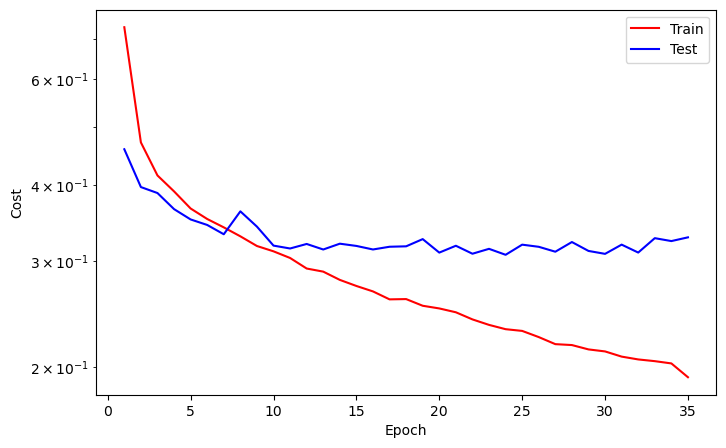

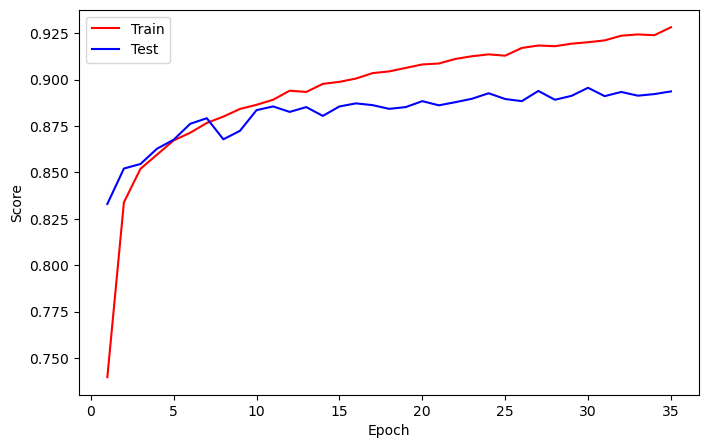

In [13]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

# Predict

In [14]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)

In [15]:
import matplotlib.pyplot as plt

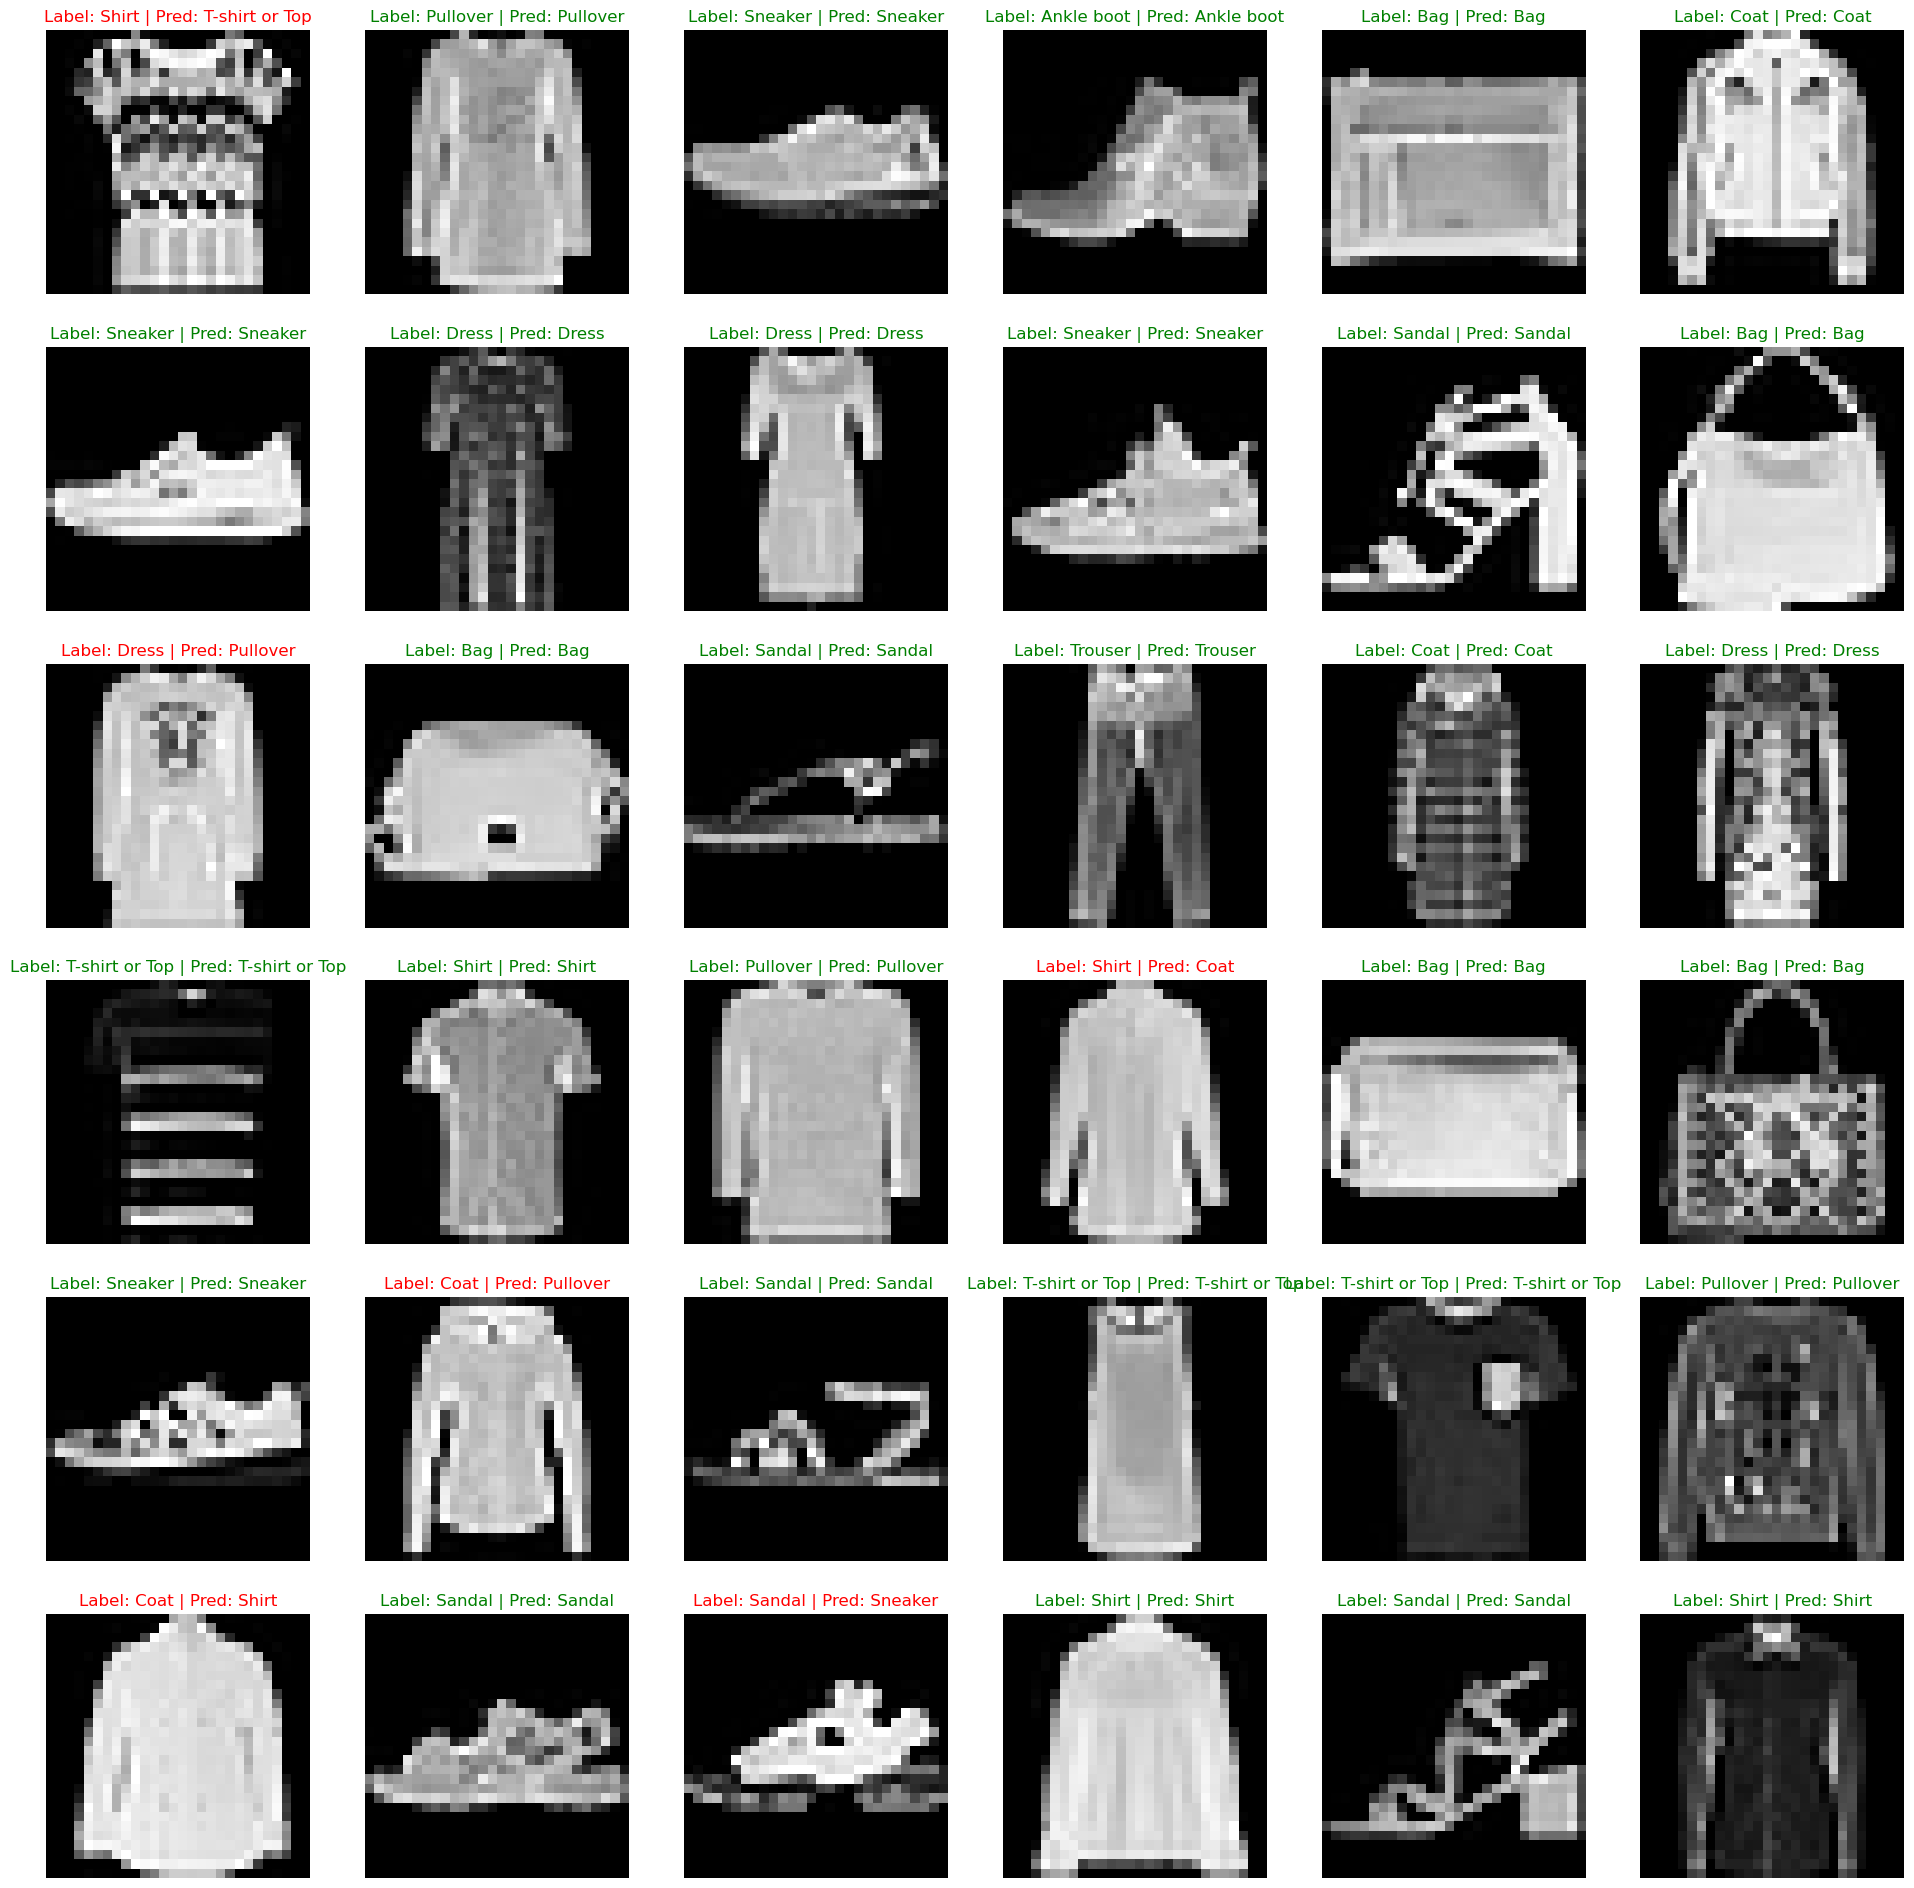

In [17]:
fig, axes = plt.subplots (6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.view(28, 28).cpu(), cmap='gray' )
    font = {"color": 'r'} if label != pred else {"color": 'g'} 
    label, pred = label2cat[label.item()], label2cat[pred.item()] 
    ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font);
    ax.axis('off');